# Polynomial Regression

In [3]:
DATASET_FILE = "../output/data/dataset.joblib"
OUTPUT_PATH = "../output/data/mpr"

In [4]:
from pathlib import Path
from dataclasses import dataclass
from numpy import sqrt
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib import font_manager, pyplot as plt
from joblib import load, dump

from dataset_type import Dataset

font_prop = font_manager.FontProperties(fname="../submodules/sarabun-font/fonts/Sarabun-Regular.ttf")

In [5]:
DATASET_FILE = Path(DATASET_FILE).resolve()
OUTPUT_PATH = Path(OUTPUT_PATH).resolve()
OUTPUT_PATH.mkdir(parents=True, exist_ok=True)

assert DATASET_FILE.is_file()

In [6]:
@dataclass
class Result:
    station: str
    degree: int
    mae: float
    mse: float
    rmse: float
    r2: float

datasets: dict[str, Dataset] = load(DATASET_FILE)
results: list[Result] = []

Station: ป่าสัก3สถานี นครหลวง 2558-2563
Best Degree: 6
Mean Absolute Error (MAE): 0.3646
Mean Squared Error (MSE): 0.2384
Root Mean Square Error (RMSE): 0.4883
R^2 Score: 0.7511


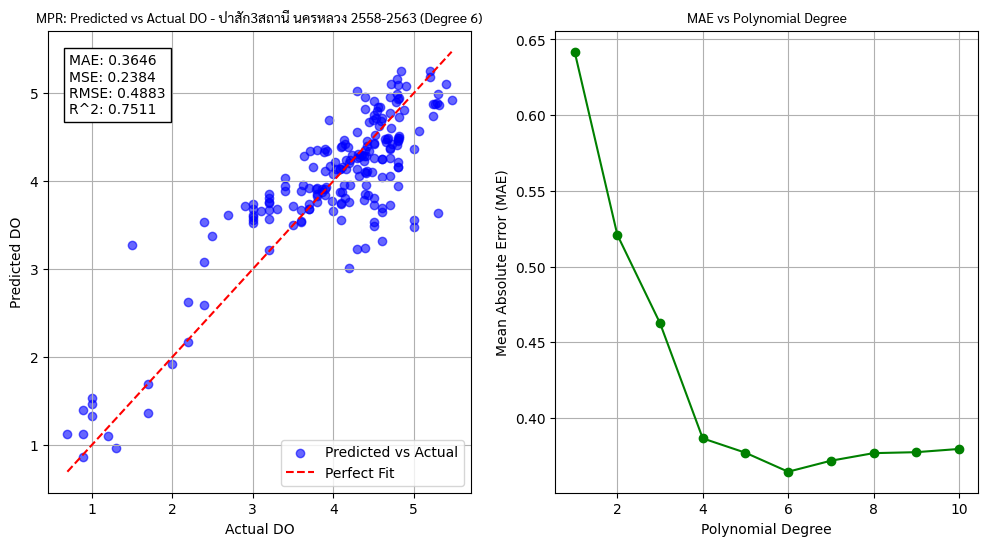

Station: ป่าสัก3สถานี แก่งคอย 2558-2563
Best Degree: 4
Mean Absolute Error (MAE): 0.2530
Mean Squared Error (MSE): 0.1203
Root Mean Square Error (RMSE): 0.3469
R^2 Score: 0.8313


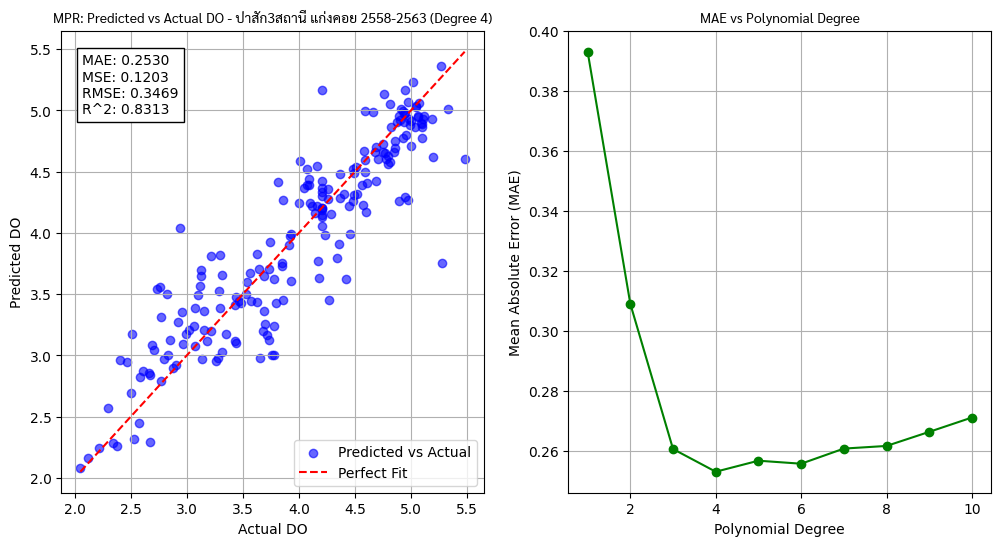

Station: ป่าสัก3สถานี เสาไห้ 2558-2563
Best Degree: 3
Mean Absolute Error (MAE): 0.2325
Mean Squared Error (MSE): 0.0755
Root Mean Square Error (RMSE): 0.2748
R^2 Score: 0.7077


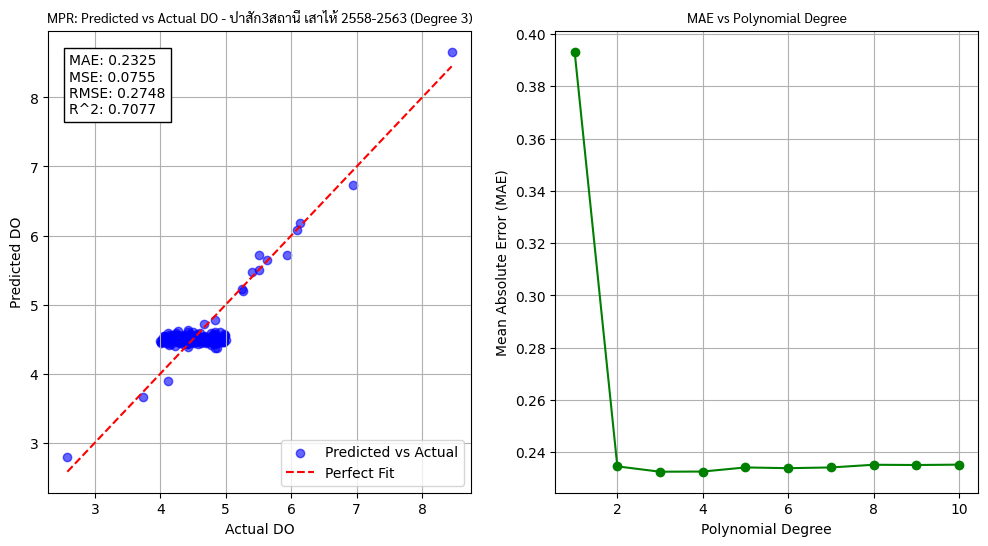

Station: ยม สุโขทัย 2558-2563
Best Degree: 5
Mean Absolute Error (MAE): 0.5718
Mean Squared Error (MSE): 0.9763
Root Mean Square Error (RMSE): 0.9881
R^2 Score: 0.7467


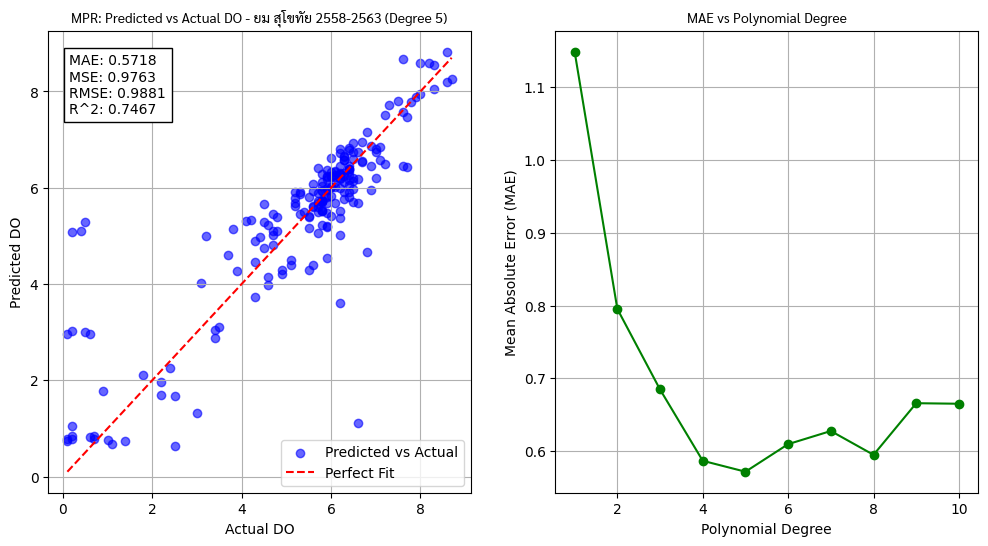

Station: ยม สามง่าม 2558-2563
Best Degree: 10
Mean Absolute Error (MAE): 0.4256
Mean Squared Error (MSE): 0.5667
Root Mean Square Error (RMSE): 0.7528
R^2 Score: 0.8929


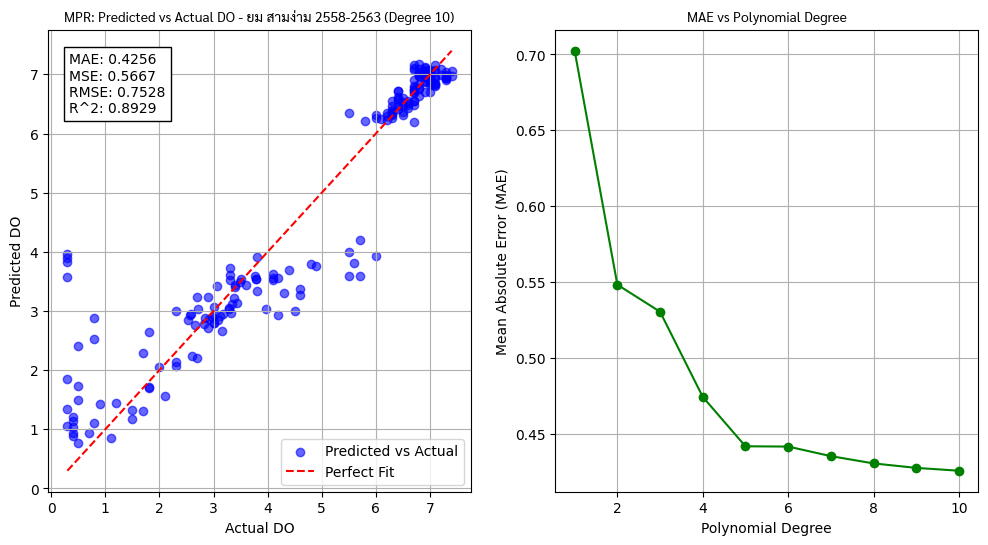

Station: ยม โพทะเล 2558-2563
Best Degree: 6
Mean Absolute Error (MAE): 0.2897
Mean Squared Error (MSE): 0.1484
Root Mean Square Error (RMSE): 0.3852
R^2 Score: 0.7222


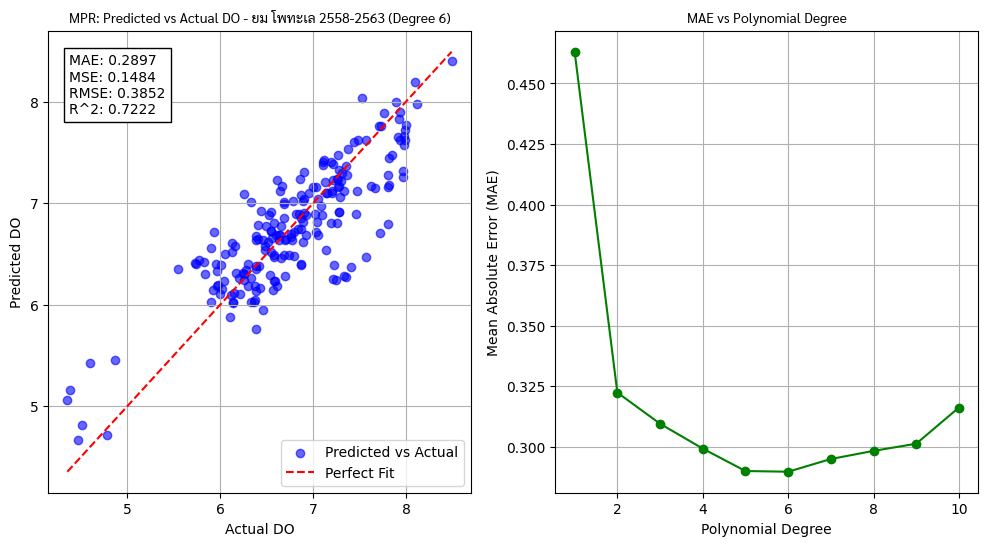

Station: วัง เกาะคา 2558-2563
Best Degree: 6
Mean Absolute Error (MAE): 0.7191
Mean Squared Error (MSE): 1.0164
Root Mean Square Error (RMSE): 1.0082
R^2 Score: 0.6826


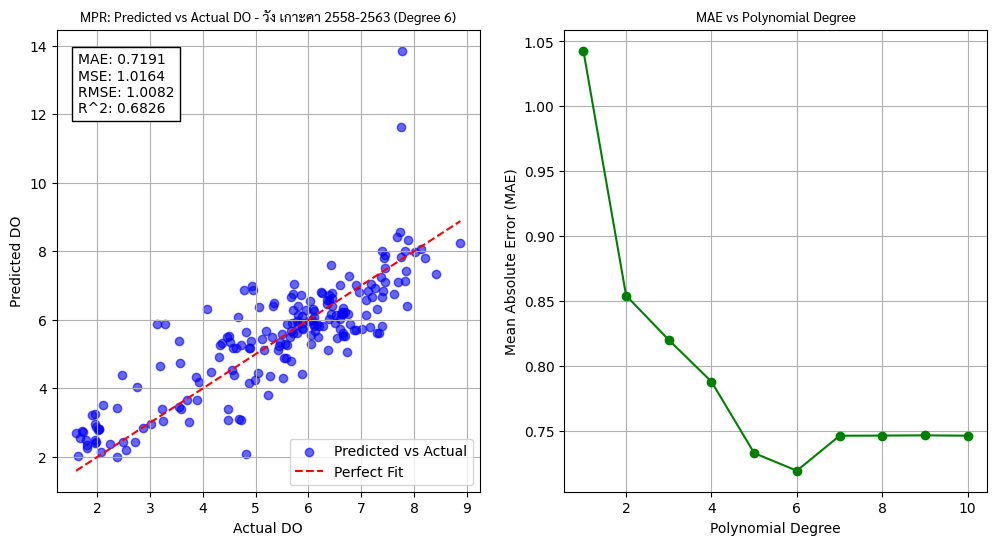

Station: แม่น้ำท่าจีน กระทุ่มแบน 2558-2563
Best Degree: 10
Mean Absolute Error (MAE): 0.1044
Mean Squared Error (MSE): 0.0219
Root Mean Square Error (RMSE): 0.1480
R^2 Score: 0.2272


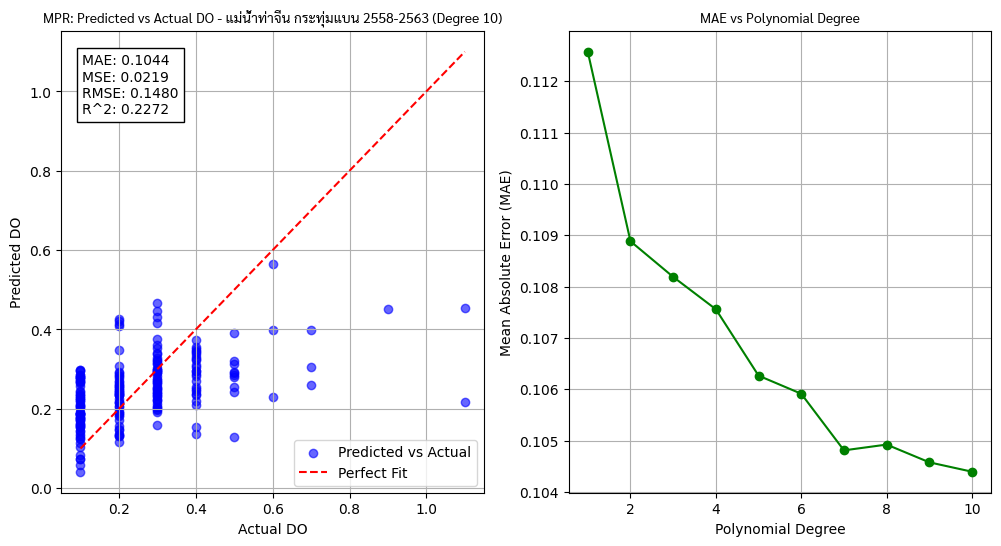

Station: แม่น้ำท่าจีน บางเลน 2558-2563
Best Degree: 3
Mean Absolute Error (MAE): 0.0941
Mean Squared Error (MSE): 0.0156
Root Mean Square Error (RMSE): 0.1247
R^2 Score: 0.8294


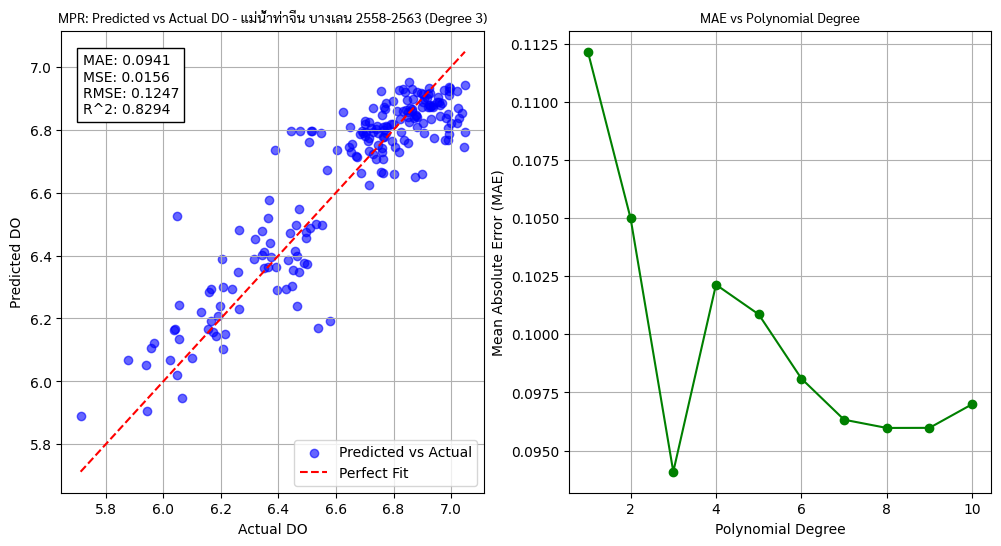

Station: แม่น้ำท่าจีน สองพี่น้อง 2558-2563
Best Degree: 4
Mean Absolute Error (MAE): 0.0885
Mean Squared Error (MSE): 0.0139
Root Mean Square Error (RMSE): 0.1177
R^2 Score: 0.8812


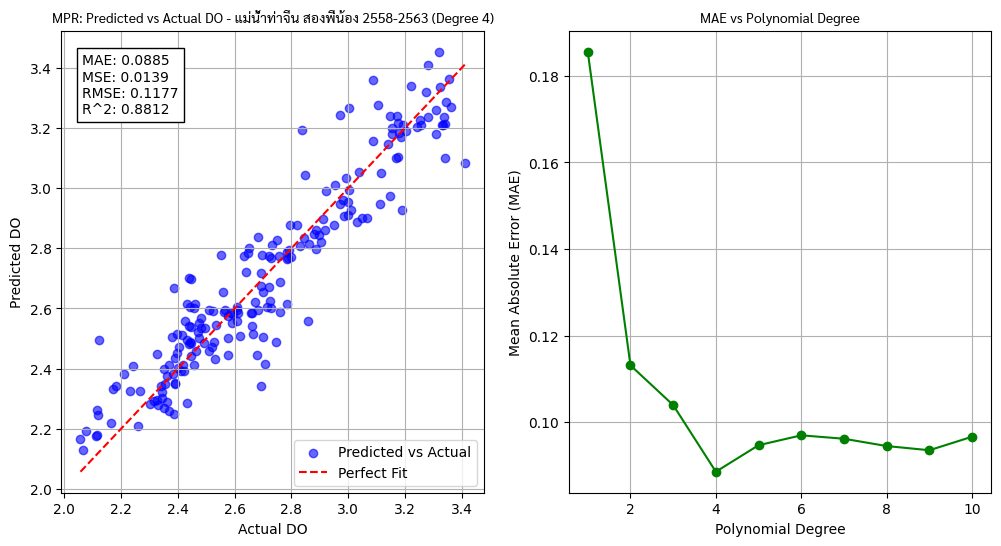

Station: แม่น้ำท่าจีน นครชัยศรี 2558-2563
Best Degree: 4
Mean Absolute Error (MAE): 0.4553
Mean Squared Error (MSE): 0.3360
Root Mean Square Error (RMSE): 0.5797
R^2 Score: 0.3727


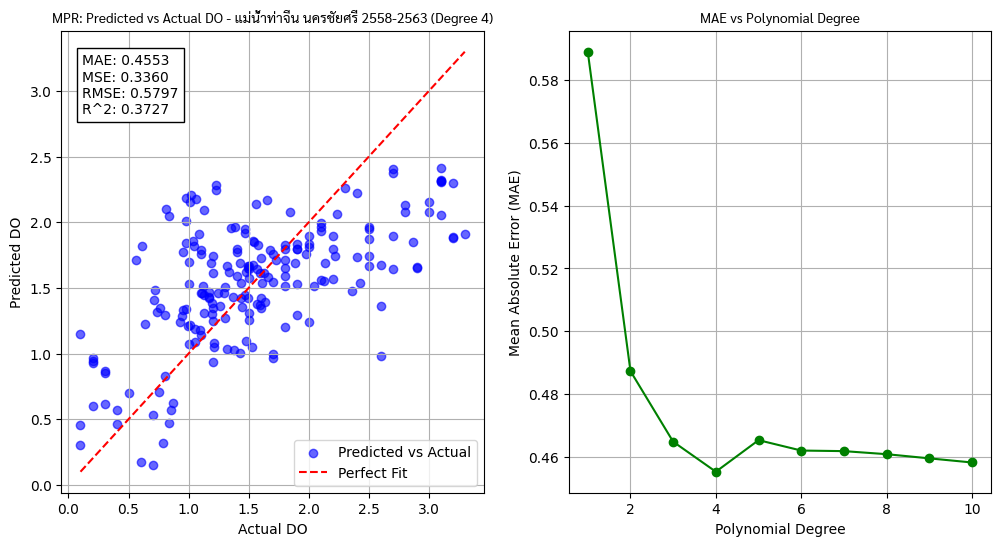

Station: แม่น้ำท่าจีน หันคา 2558-2563
Best Degree: 5
Mean Absolute Error (MAE): 0.1862
Mean Squared Error (MSE): 0.0577
Root Mean Square Error (RMSE): 0.2402
R^2 Score: 0.7739


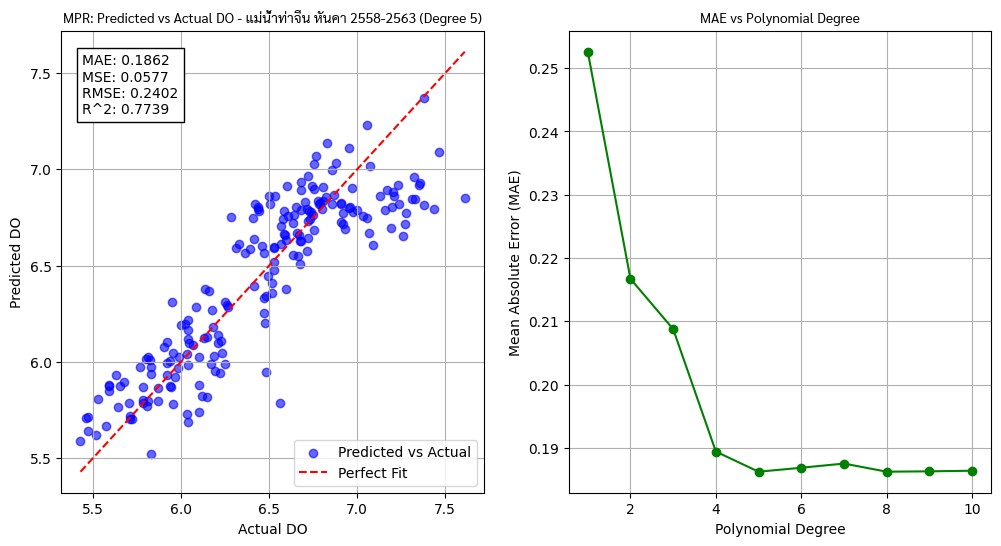

Station: แม่น้ำท่าจีน สุพรรณบุรี 2558-2563
Best Degree: 4
Mean Absolute Error (MAE): 0.2690
Mean Squared Error (MSE): 0.1170
Root Mean Square Error (RMSE): 0.3420
R^2 Score: 0.5182


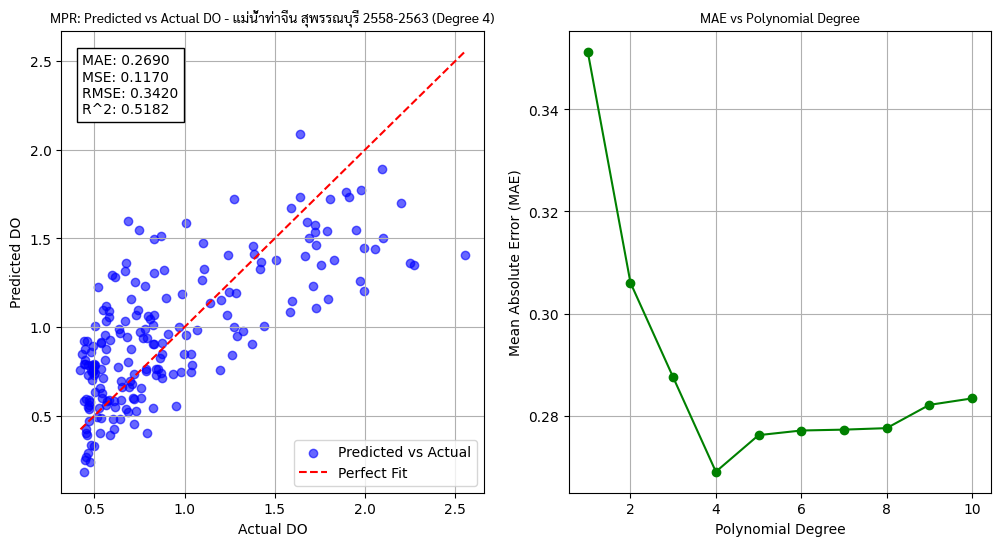

Station: แม่น้ำท่าจีน สามชุก 2558-2563
Best Degree: 5
Mean Absolute Error (MAE): 0.4299
Mean Squared Error (MSE): 0.2978
Root Mean Square Error (RMSE): 0.5457
R^2 Score: 0.5161


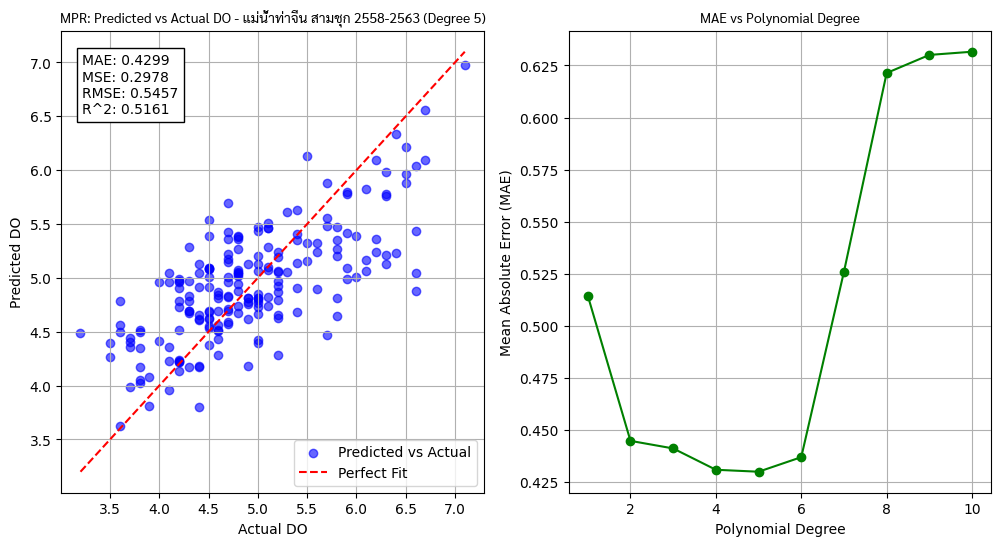

Station: ปิง เชียงใหม่ 2558-2563
Best Degree: 8
Mean Absolute Error (MAE): 0.7496
Mean Squared Error (MSE): 1.2097
Root Mean Square Error (RMSE): 1.0999
R^2 Score: 0.3475


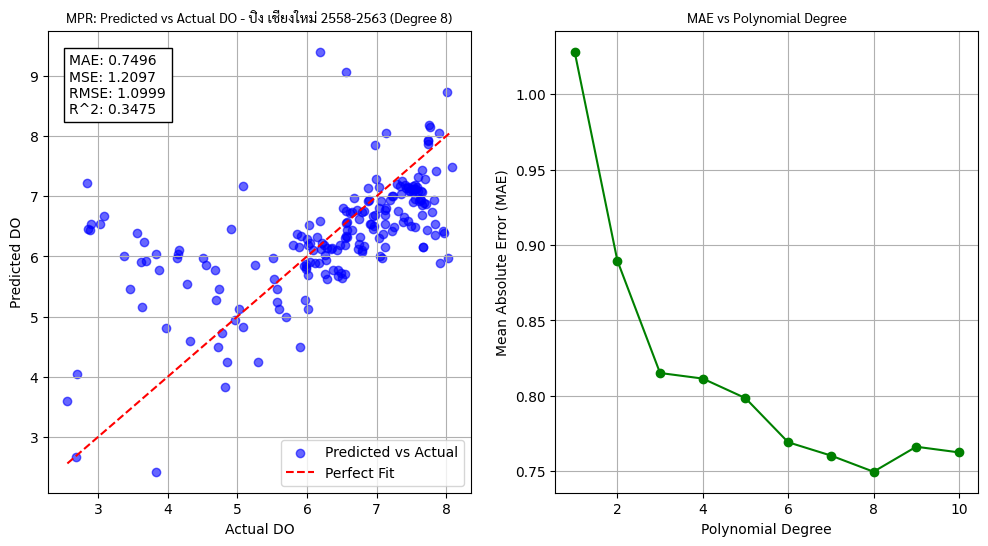

Station: ปิง กำแพงเพชร 2558-2563
Best Degree: 4
Mean Absolute Error (MAE): 0.2063
Mean Squared Error (MSE): 0.0629
Root Mean Square Error (RMSE): 0.2509
R^2 Score: 0.4893


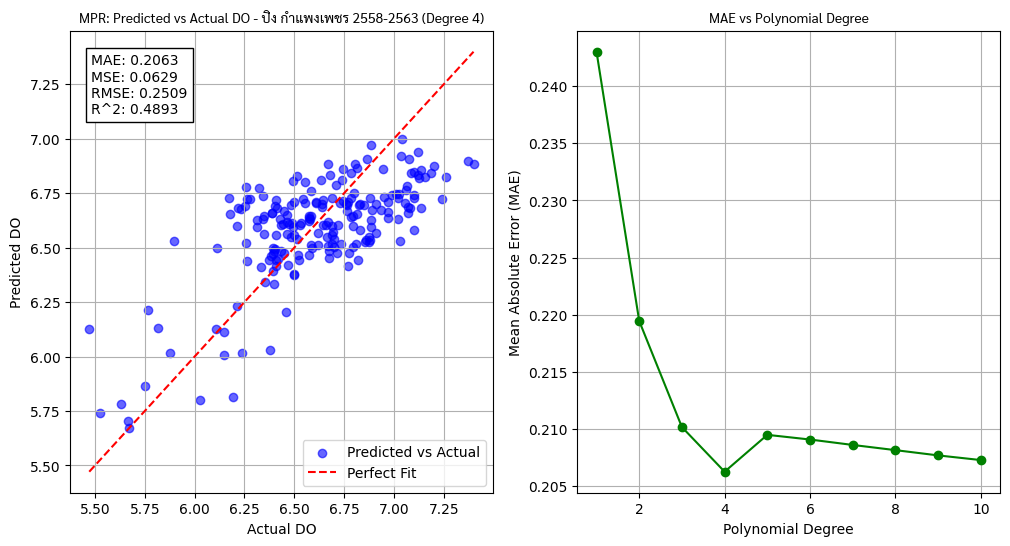

Station: น่าน อุตรดิตถ์ 2558-2563
Best Degree: 3
Mean Absolute Error (MAE): 0.1756
Mean Squared Error (MSE): 0.0560
Root Mean Square Error (RMSE): 0.2367
R^2 Score: 0.3973


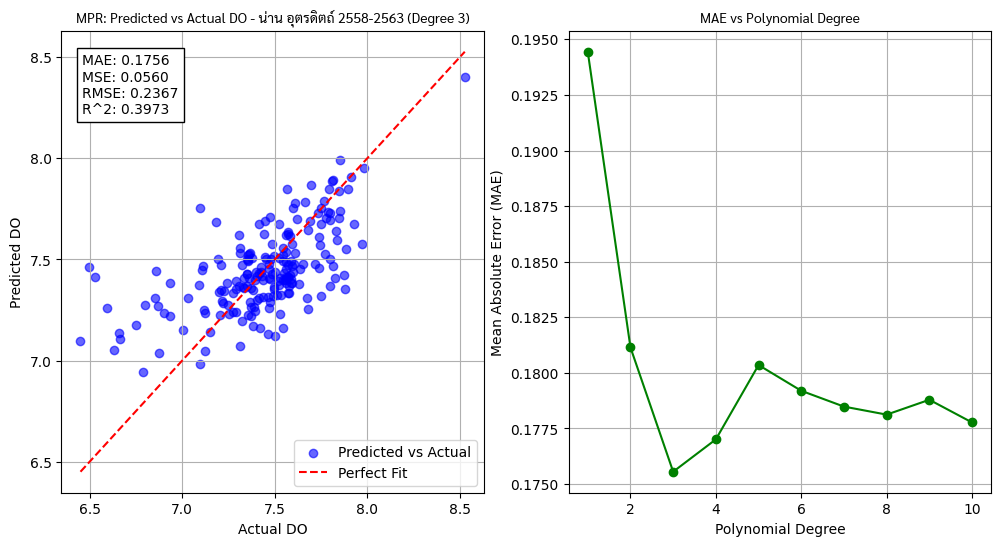

Station: น่าน น่าน 2558-2563
Best Degree: 10
Mean Absolute Error (MAE): 0.2784
Mean Squared Error (MSE): 0.1264
Root Mean Square Error (RMSE): 0.3556
R^2 Score: 0.5957


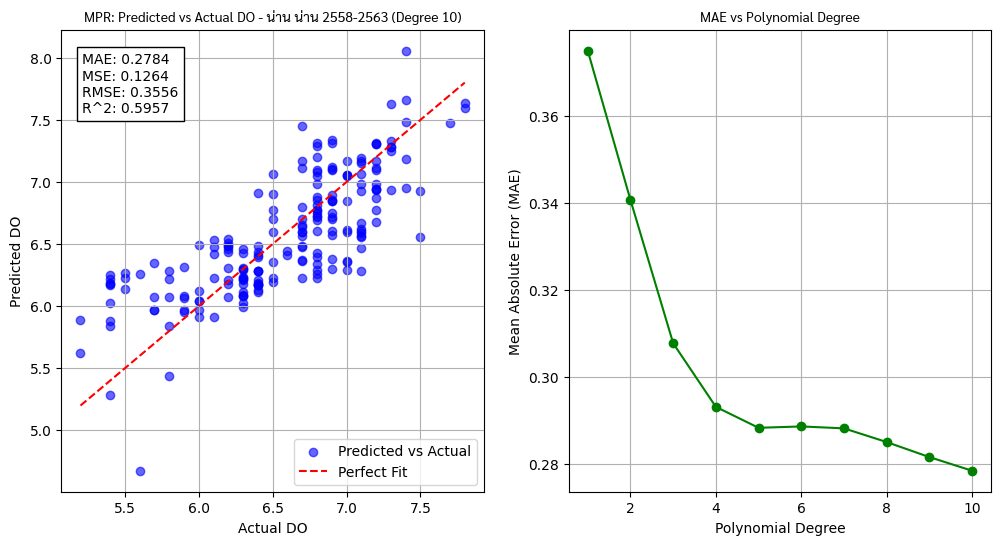

Station: น่าน พิษณุโลก 2558-2563
Best Degree: 5
Mean Absolute Error (MAE): 0.2180
Mean Squared Error (MSE): 0.0740
Root Mean Square Error (RMSE): 0.2720
R^2 Score: 0.7983


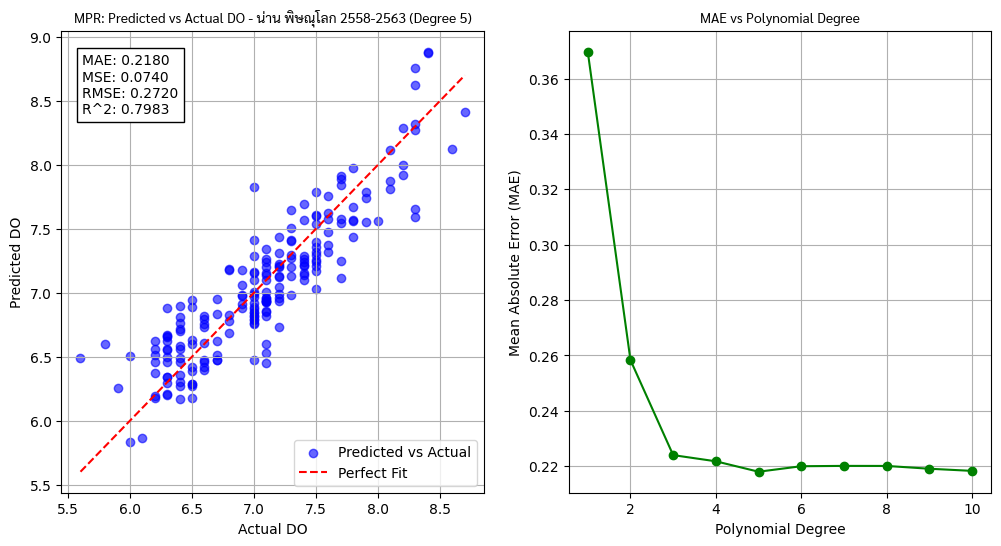

In [7]:
for station, dataset in datasets.items():
    degree_results = []

    for degree in range(1, 11):
        poly = PolynomialFeatures(degree=degree)
        
        X_train_poly = poly.fit_transform(dataset.X_train)
        X_test_poly = poly.transform(dataset.X_test)
        
        model = LinearRegression()
        model.fit(X_train_poly, dataset.y_train)
        
        y_pred = model.predict(X_test_poly)
        mae = mean_absolute_error(dataset.y_test, y_pred)
        
        degree_results.append((degree, mae, model, poly, y_pred))
    
    best_degree, best_mae, best_model, best_poly, best_y_pred = min(degree_results, key=lambda x: x[1])
    
    mse = mean_squared_error(dataset.y_test, best_y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(dataset.y_test, best_y_pred)
    
    print(f"Station: {station}")
    print(f"Best Degree: {best_degree}")
    print(f"Mean Absolute Error (MAE): {best_mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    
    results.append(Result(station, best_degree, best_mae, mse, rmse, r2))
    
    dump(best_model, OUTPUT_PATH / f"{station}_model.joblib")
    dump(best_poly, OUTPUT_PATH / f"{station}_poly_transformer.joblib")
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), facecolor="white")
    
    ax[0].scatter(dataset.y_test, best_y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
    ax[0].plot([min(dataset.y_test), max(dataset.y_test)], [min(dataset.y_test), max(dataset.y_test)], color="red", linestyle="--", label="Perfect Fit")
    ax[0].set_xlabel("Actual DO")
    ax[0].set_ylabel("Predicted DO")
    ax[0].set_title(f"MPR: Predicted vs Actual DO - {station} (Degree {best_degree})", fontproperties=font_prop)
    ax[0].legend()
    ax[0].grid()
    
    textstr = f"MAE: {best_mae:.4f}\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nR^2: {r2:.4f}"
    ax[0].text(0.05, 0.95, textstr, transform=ax[0].transAxes, fontsize=10, verticalalignment="top", bbox=dict(facecolor="white", alpha=1))
    
    degrees, maes, _, _, _ = zip(*degree_results)
    ax[1].plot(degrees, maes, marker='o', linestyle='-', color='green')
    ax[1].set_xlabel("Polynomial Degree")
    ax[1].set_ylabel("Mean Absolute Error (MAE)")
    ax[1].set_title("MAE vs Polynomial Degree", fontproperties=font_prop)
    ax[1].grid()
    
    plt.savefig(OUTPUT_PATH / f"mpr-pred-actual-{station}.png")
    plt.show()

In [8]:
results_df = DataFrame([result.__dict__ for result in results])
results_df.to_csv(OUTPUT_PATH / "results.csv", index=False)